# Financial Workflow Automation System
Automating monthly financial reporting using Python.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("Financial_Workflow_Data.csv", parse_dates=["Date"])
df.head()

,Transaction_ID,Client_ID,Transaction_Type,Amount,Department,Date
0,1,1102,income,720.45,Finance,2024-12-12
1,2,1435,income,641.17,Marketing,2024-07-27
2,3,1860,expense,114.39,Finance,2024-12-20
3,4,1270,expense,206.22,Sales,2024-09-19
4,5,1106,expense,317.29,Sales,2024-10-21


## Step 1: Dataset Overview

In [3]:
print("Shape of data:", df.shape)
print("Data Types:")
print(df.dtypes)
print("Date Range:", df["Date"].min(), "to", df["Date"].max())

Shape of data: (6000, 6)
Data Types:
Transaction_ID               int64
Client_ID                    int64
Transaction_Type            object
Amount                     float64
Department                  object
Date                datetime64[ns]
dtype: object
Date Range: 2024-07-01 00:00:00 to 2024-12-31 00:00:00


## Step 2: Add Month and Year Columns

In [4]:
df["Month"] = df["Date"].dt.to_period("M")
df.head()

,Transaction_ID,Client_ID,Transaction_Type,Amount,Department,Date,Month
0,1,1102,income,720.45,Finance,2024-12-12,2024-12
1,2,1435,income,641.17,Marketing,2024-07-27,2024-07
2,3,1860,expense,114.39,Finance,2024-12-20,2024-12
3,4,1270,expense,206.22,Sales,2024-09-19,2024-09
4,5,1106,expense,317.29,Sales,2024-10-21,2024-10


## Step 3: Monthly KPI Summary

In [5]:
summary = df.groupby(["Month", "Department", "Transaction_Type"])["Amount"].sum().unstack().fillna(0)
summary["Net_Income"] = summary["income"] - summary["expense"]
summary["Profit_Margin_%"] = (summary["Net_Income"] / summary["income"]) * 100
summary = summary.reset_index()
summary.head()

Transaction_Type,Month,Department,expense,income,Net_Income,Profit_Margin_%
0,2024-07,Finance,92248.02,41351.92,-50896.10,-123.080379
1,2024-07,HR,65419.01,55059.51,-10359.50,-18.815097
2,2024-07,Marketing,100925.98,52423.19,-48502.79,-92.521630
3,2024-07,Sales,64830.96,44144.15,-20686.81,-46.861951
4,2024-08,Finance,81954.62,58761.76,-23192.86,-39.469308


## Step 4: Visualize Monthly Net Income by Department

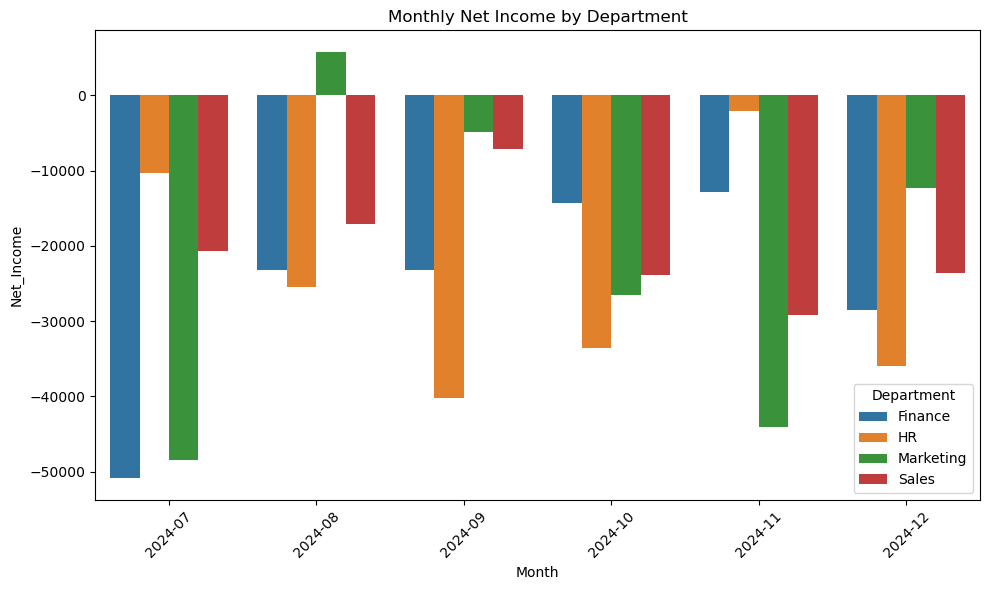

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(data=summary, x="Month", y="Net_Income", hue="Department")
plt.title("Monthly Net Income by Department")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Step 5: Visualize Profit Margin by Department

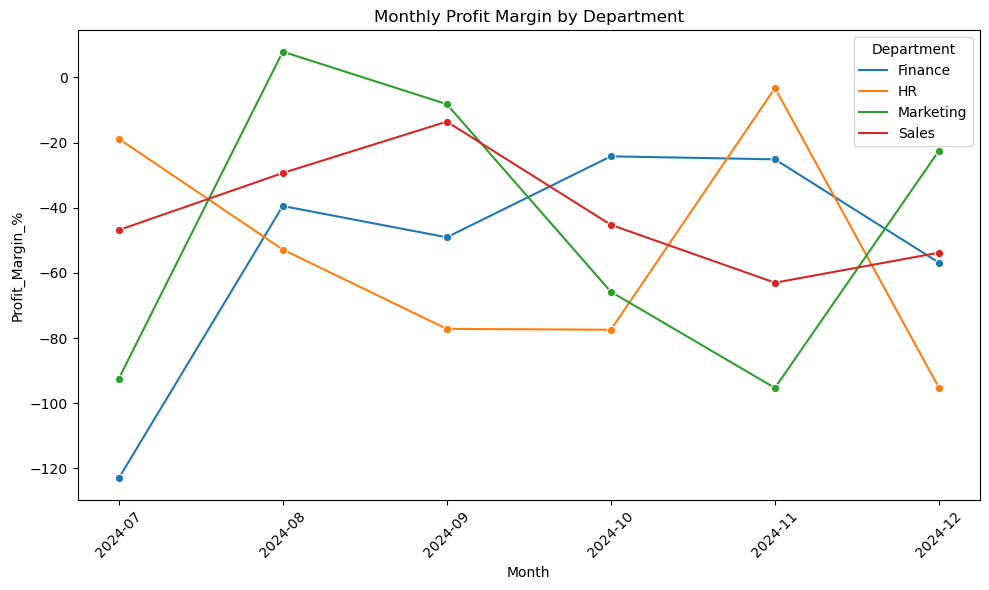

In [10]:
# Convert Month from Period to string
summary["Month"] = summary["Month"].astype(str)

# Profit Margin is numeric and clean
summary["Profit_Margin_%"] = pd.to_numeric(summary["Profit_Margin_%"], errors="coerce")
summary = summary.dropna(subset=["Profit_Margin_%"])

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=summary, x="Month", y="Profit_Margin_%", hue="Department", marker="o")
plt.title("Monthly Profit Margin by Department")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
